In [ ]:
#@title ToyotaCorolla
#Consider only the below columns and prepare a prediction model for predicting Price.
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
data

In [ ]:
#@title Perform EDA

In [ ]:
df_new = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df_new.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
df_new.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
df_new.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
df_new=df_new.rename({"Price":'price',"Age_08_04":'age',"KM":'km',"HP":'hp',"cc":'cc',"Doors":'doors',"Gears":'gears',"Quarterly_Tax":'tax',"Weight":'wt'},axis=1)

In [ ]:
df_new.head()

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
df_new.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [ ]:
df_new[df_new.duplicated]

,price,age,km,hp,cc,doors,gears,tax,wt
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
df_new=df_new.drop([113])


KeyError: ignored

In [ ]:
df_new[df_new.duplicated]

,price,age,km,hp,cc,doors,gears,tax,wt


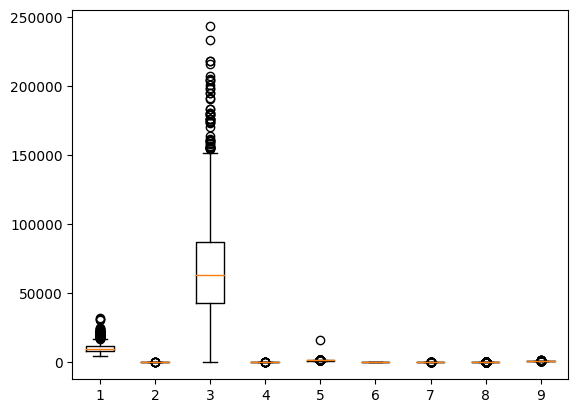

In [ ]:
plt.boxplot(df_new)
plt.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'km'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'doors'}>],
       [<Axes: title={'center': 'gears'}>,
        <Axes: title={'center': 'tax'}>, <Axes: title={'center': 'wt'}>]],
      dtype=object)

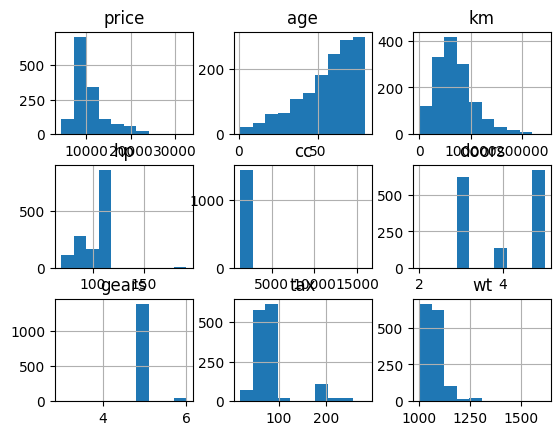

In [ ]:
df_new.hist()

In [ ]:
#correlation
df_new.corr()

,price,age,km,hp,cc,doors,gears,tax,wt
price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df_new)

In [ ]:
#@title Prepairing a model


In [ ]:
model=smf.ols('price~age+km+hp+cc+doors+gears+tax+wt',data=df_new).fit()
model

In [ ]:
#model parameter
model.params

In [ ]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

In [ ]:
print(model.rsquared,model.rsquared_adj)

In [ ]:
#simple linear regression
p_km=smf.ols('price~km',data=df_new).fit()

#p and t values
print(p_km.tvalues,'\n',p_km.pvalues)

In [ ]:
p_cc=smf.ols('price~cc',data=df_new).fit()

#p and t values
print(p_cc.tvalues,'\n',p_cc.pvalues)

In [ ]:
p_kc=smf.ols('price~km+cc',data=df_new).fit()

#p and t values
print(p_kc.tvalues,'\n',p_kc.pvalues)

In [ ]:
print(p_kc.rsquared,p_kc.rsquared_adj)

In [ ]:
#Calculating VIF
rsq_age=smf.ols('age~km+hp+cc+doors+gears+tax+wt',data=df_new).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('km~age+hp+cc+doors+gears+tax+wt',data=df_new).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('hp~age+km+cc+doors+gears+tax+wt',data=df_new).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~age+hp+km+doors+gears+tax+wt',data=df_new).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('doors~age+hp+cc+km+gears+tax+wt',data=df_new).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('gears~age+hp+cc+doors+km+tax+wt',data=df_new).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_tax=smf.ols('tax~km+age+hp+cc+doors+gears+wt',data=df_new).fit().rsquared
vif_tax=1/(1-rsq_tax)

rsq_wt=smf.ols('wt~age+hp+cc+doors+gears+tax+km',data=df_new).fit().rsquared
vif_wt=1/(1-rsq_wt)

d1={'Variables':['age','km','hp','cc','doors','gears','tax','wt'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax,vif_wt]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,doors,1.155890
5,gears,1.098843
6,tax,2.295375
7,wt,2.487180


In [ ]:
#AIC
import statsmodels.formula.api as smf
model=smf.ols('price~km+hp+cc+doors+gears+tax+wt',data=df_new).fit()
print(model.rsquared,model.aic)

0.6535931591948922 26074.541879005013


In [ ]:
model=smf.ols('price~age+wt+hp+cc+doors+gears+tax',data=df_new).fit()
print(model.rsquared,model.aic)

0.8361054813317335 25000.600962284574


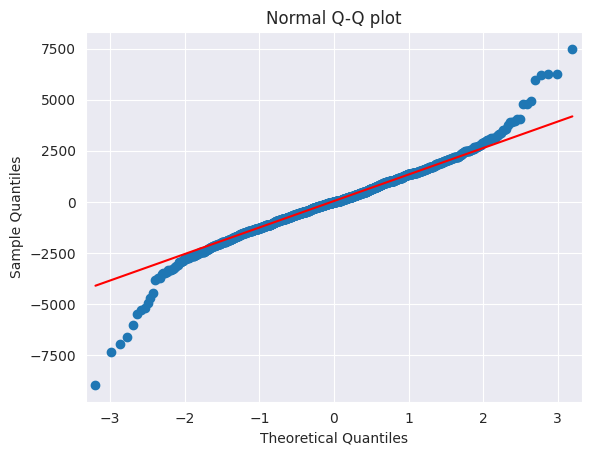

In [ ]:
#Normality cheack using Q-Q plot
import statsmodels.api as sm
model=smf.ols('price~age+wt+hp+cc+doors+gears+tax',data=df_new).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

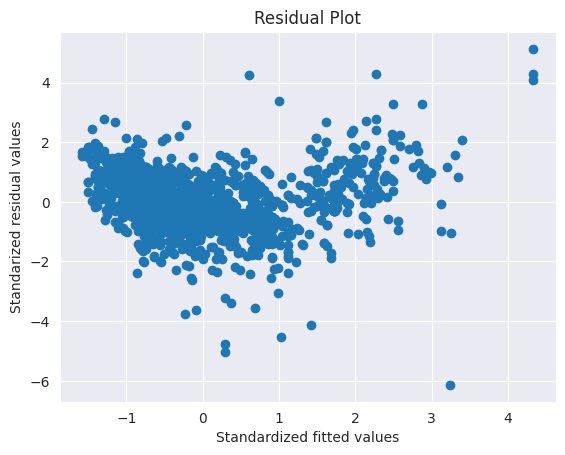

In [ ]:
#Residual Homosedasiticity
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standarized residual values')
plt.show()

eval_env: 1


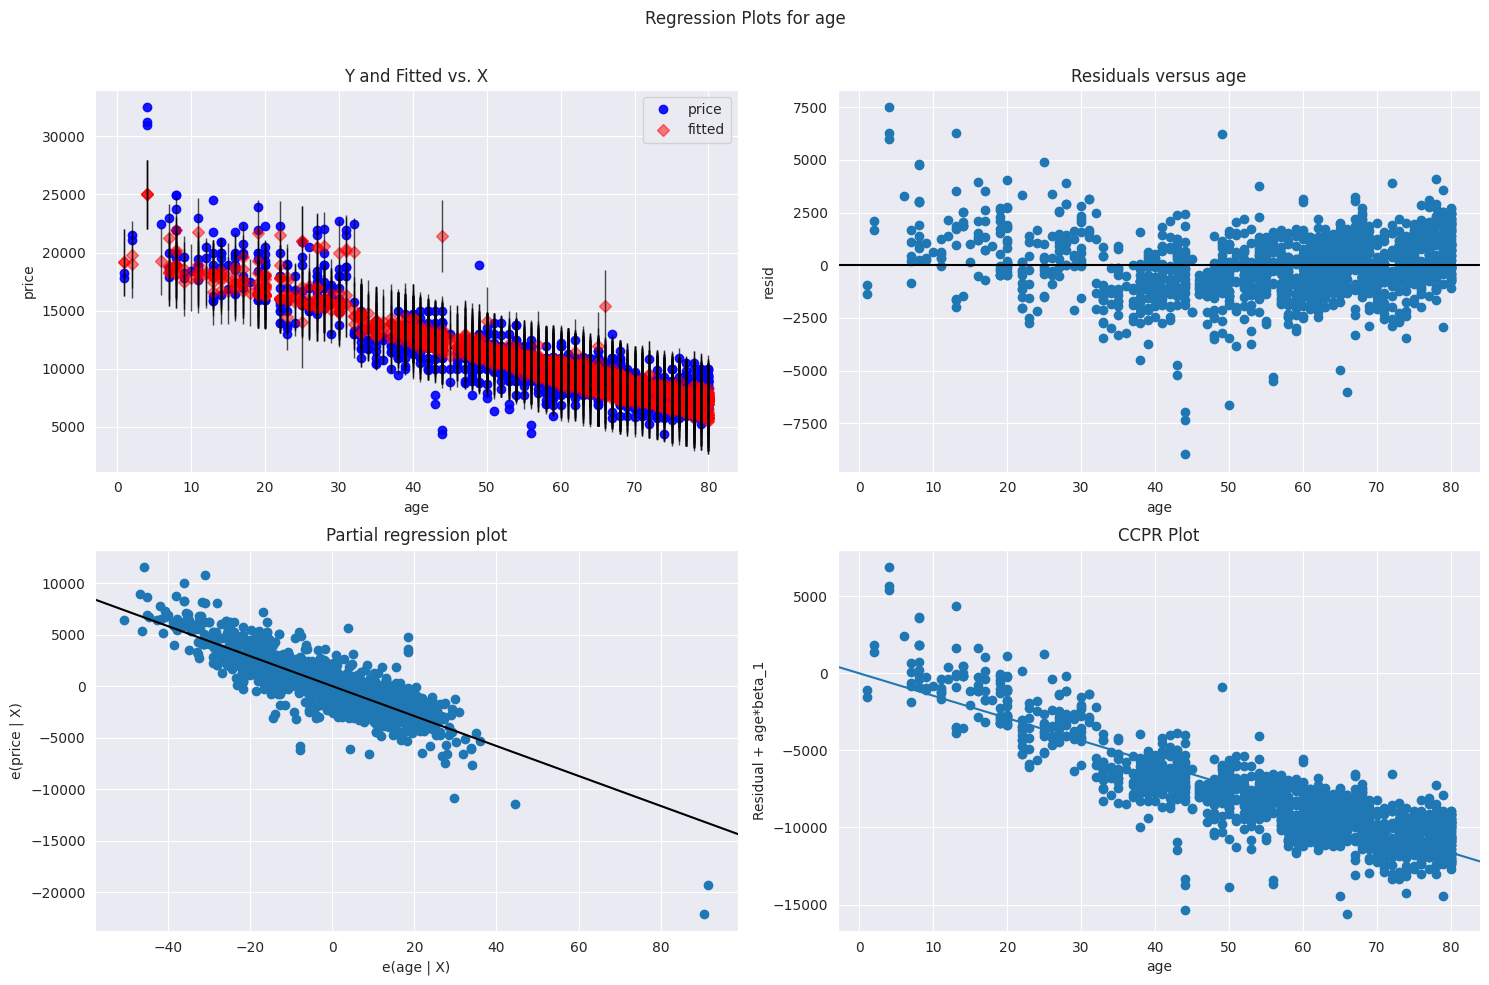

In [ ]:
#Residual vs Regressor
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x1000 with 0 Axes>

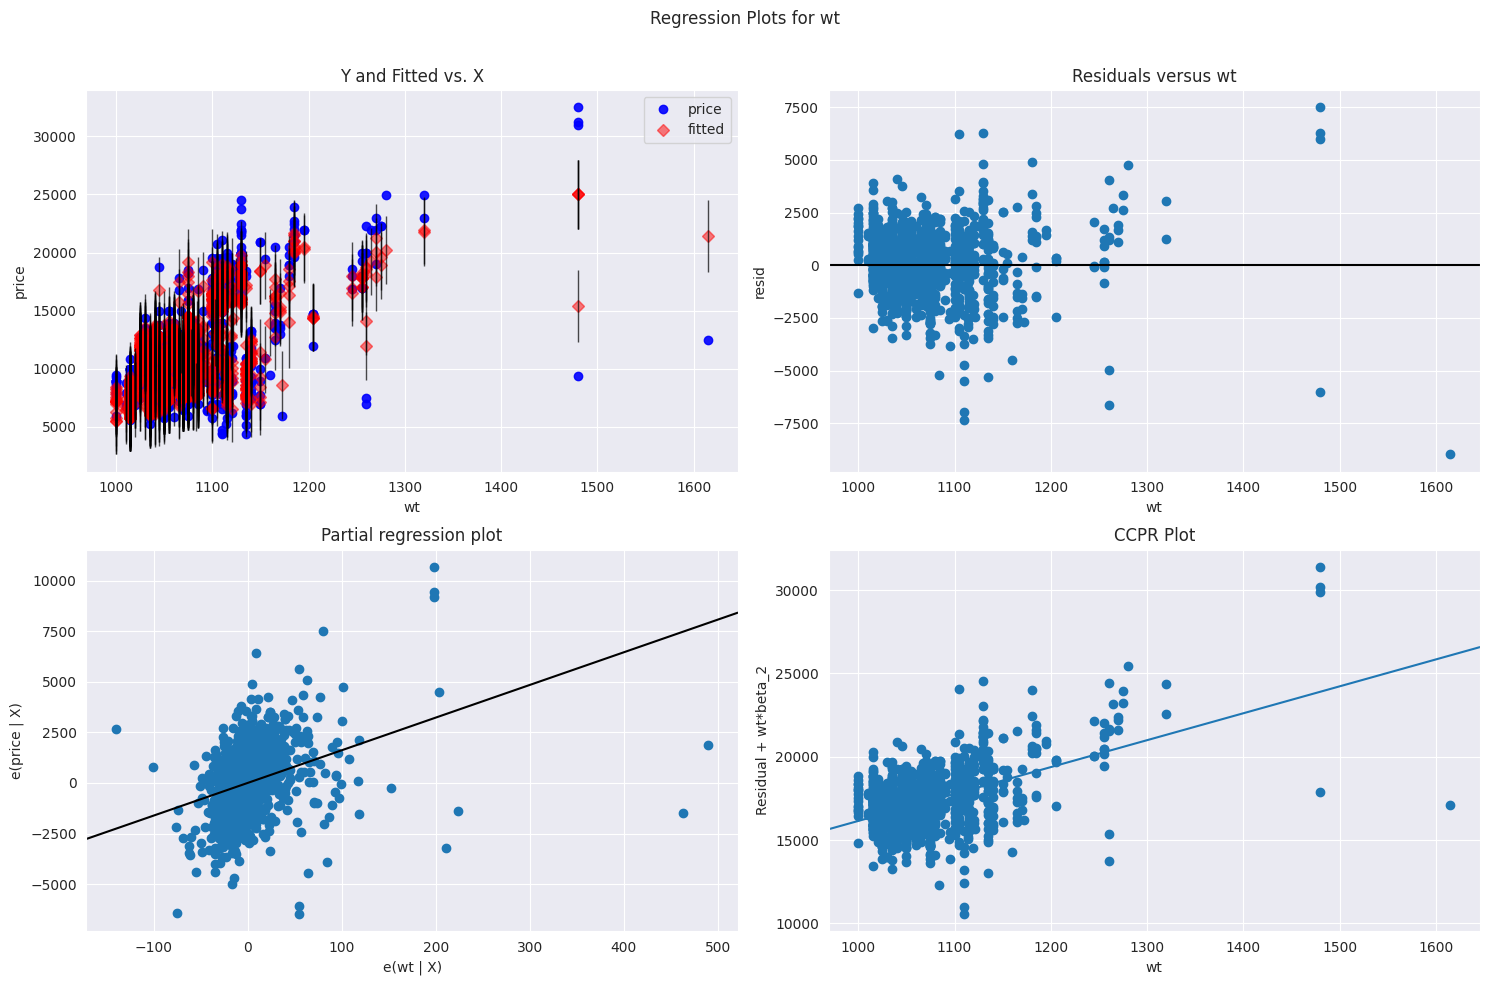

In [ ]:

fig=plt.figure(figsize=(15,10))
fig=sm.grfig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'wt',fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x1000 with 0 Axes>

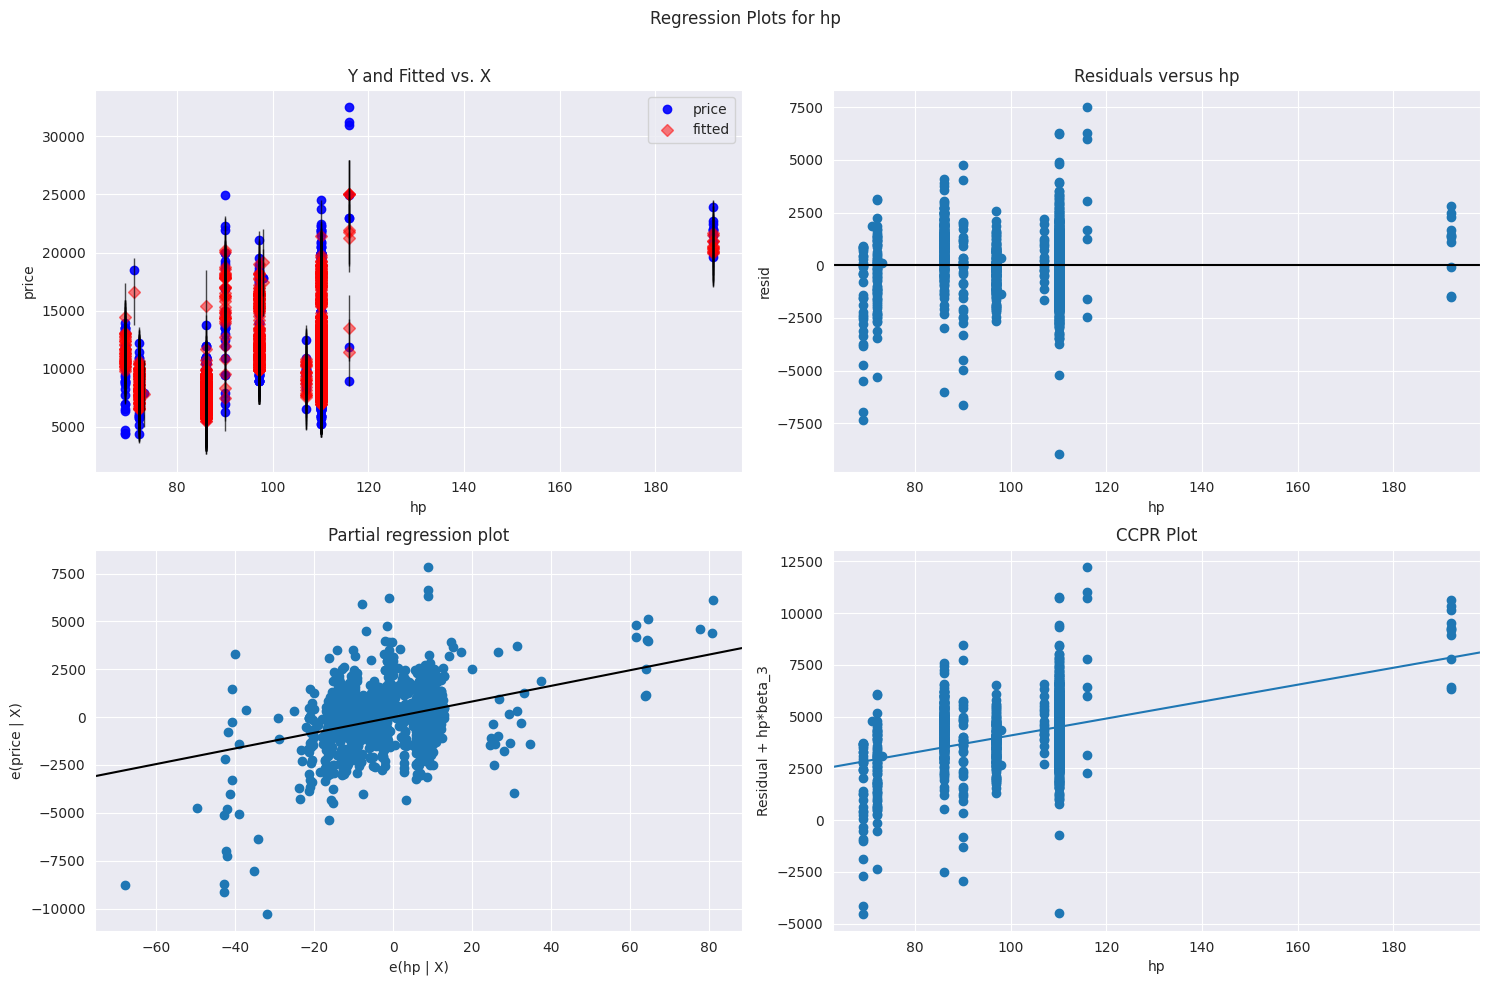

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.grfig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'hp',fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x1000 with 0 Axes>

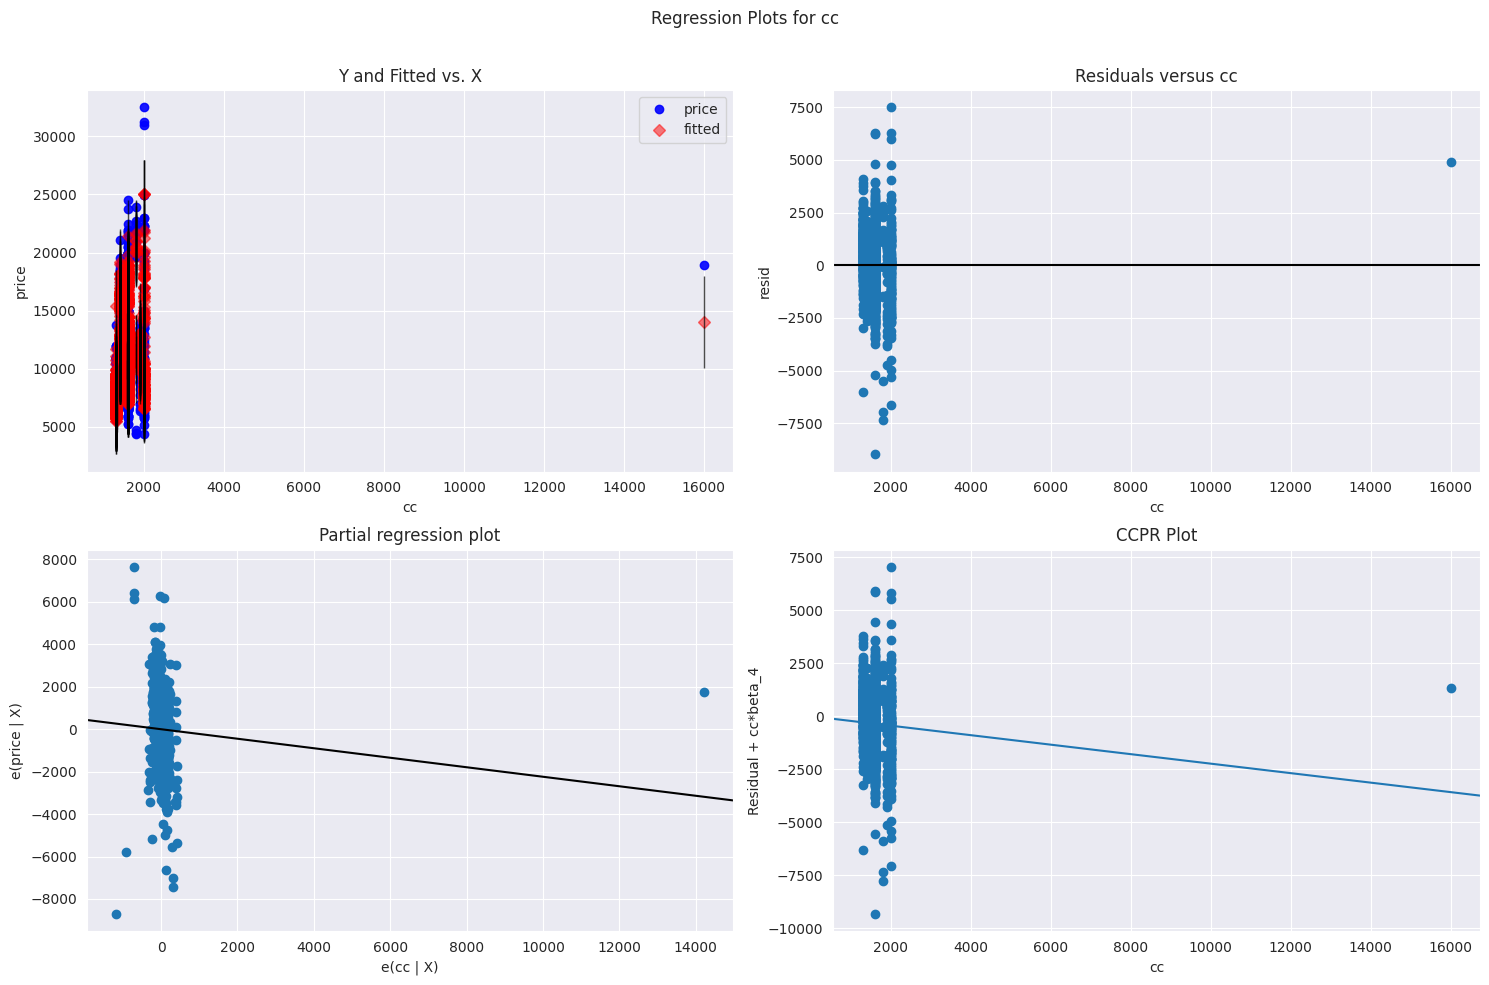

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.grfig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x1000 with 0 Axes>

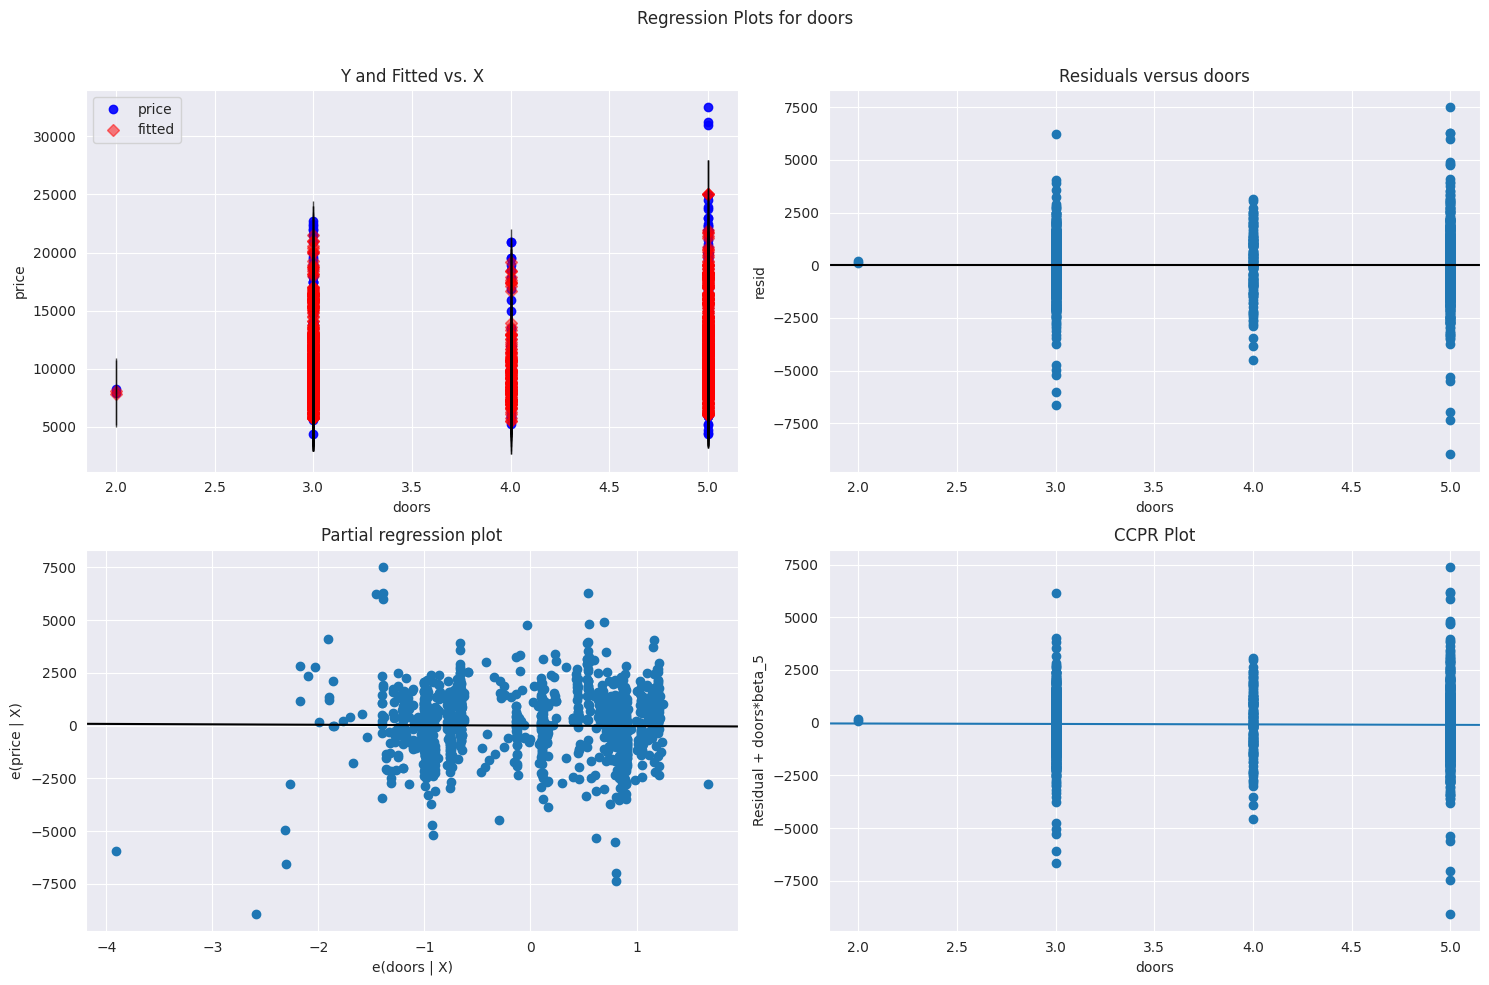

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.grfig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'doors',fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x1000 with 0 Axes>

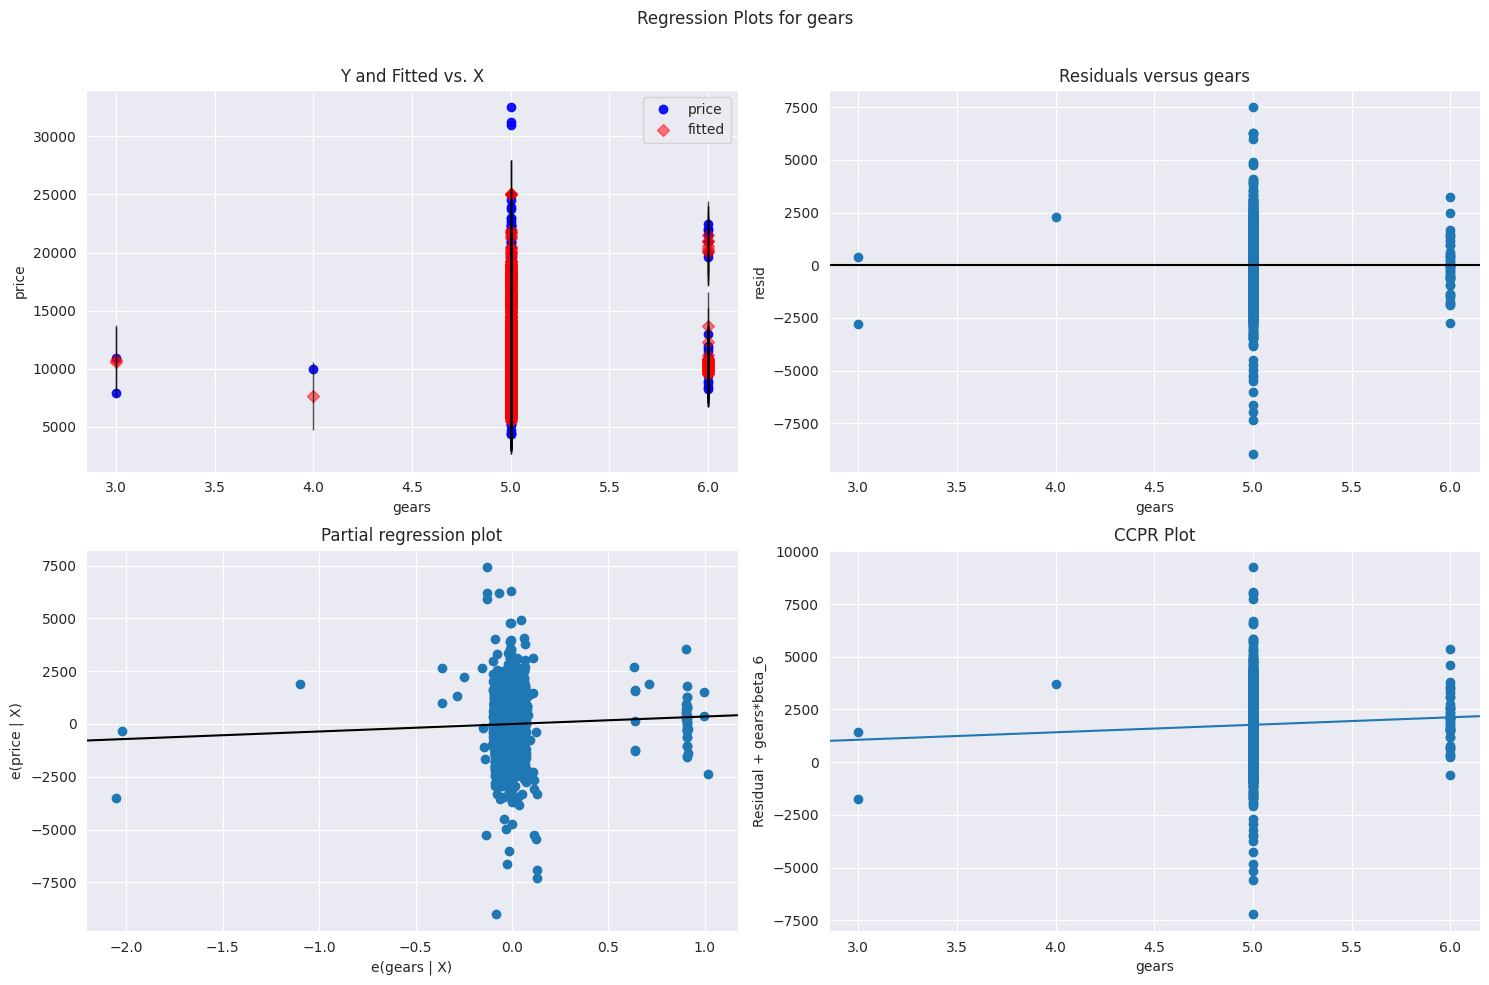

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.grfig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'gears',fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x1000 with 0 Axes>

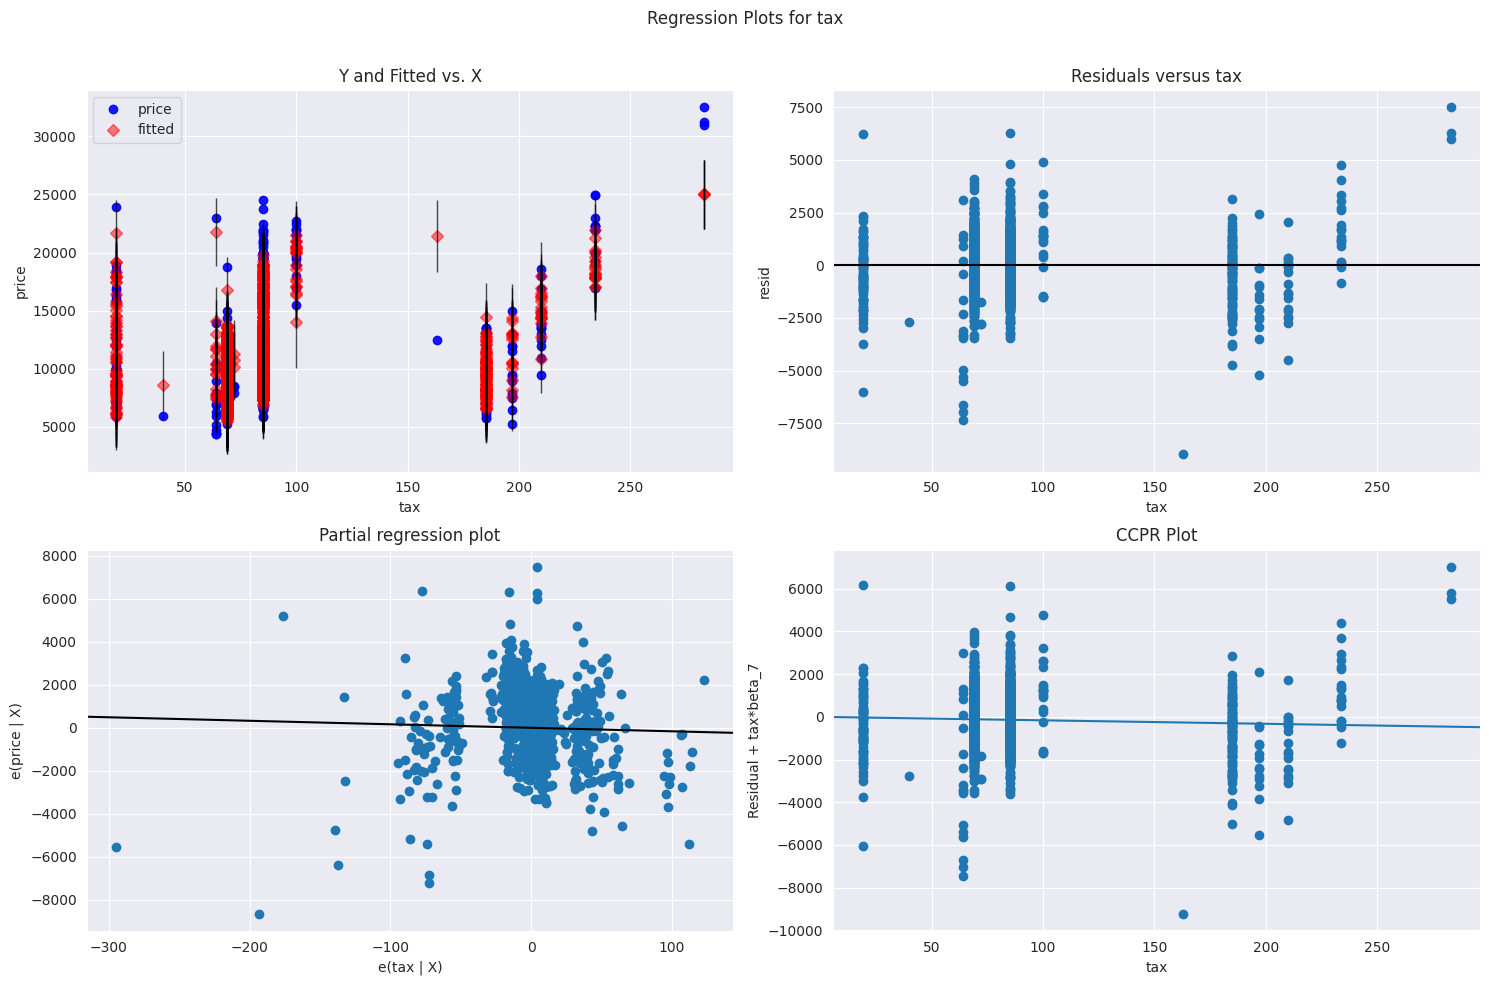

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.grfig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'tax',fig=fig)
plt.show()

In [ ]:
#@title Model Deletion Diagnostics
#cooks distance
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

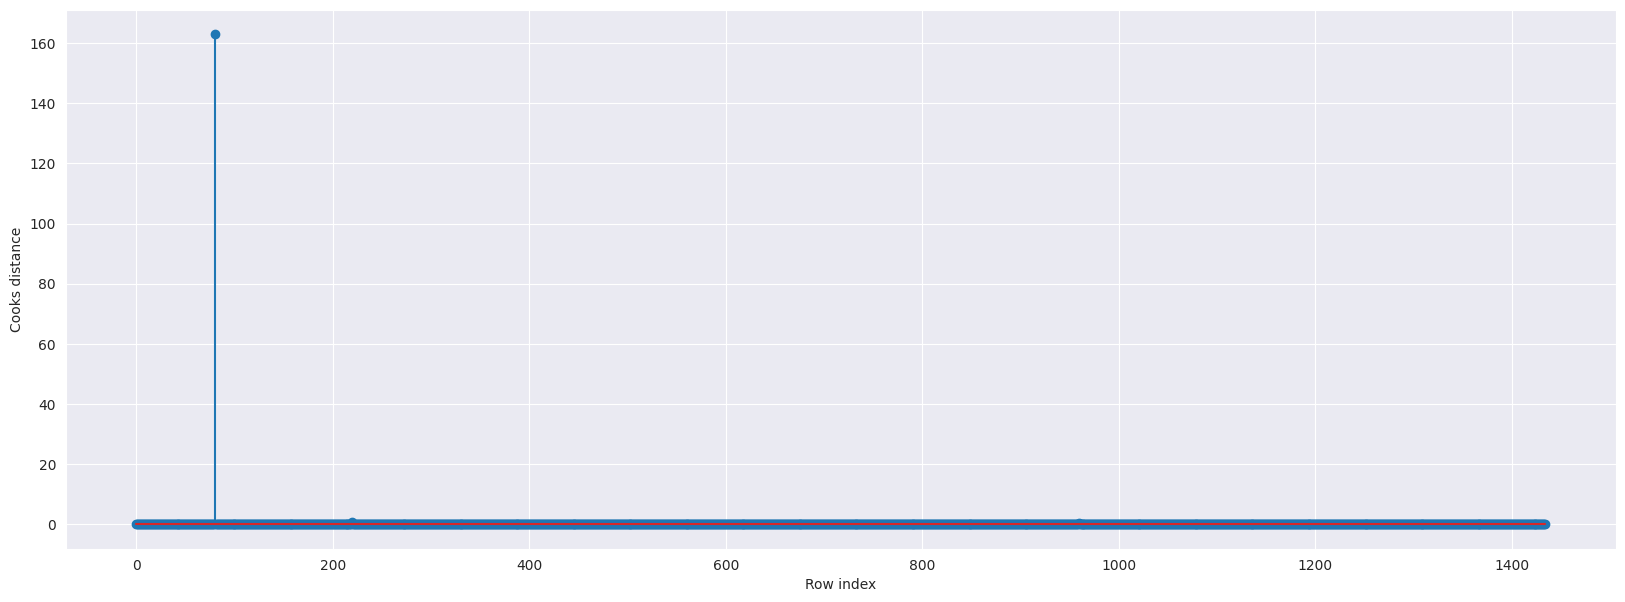

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [ ]:
print(np.argmax(c),np.max(c))

80 162.97218051497347


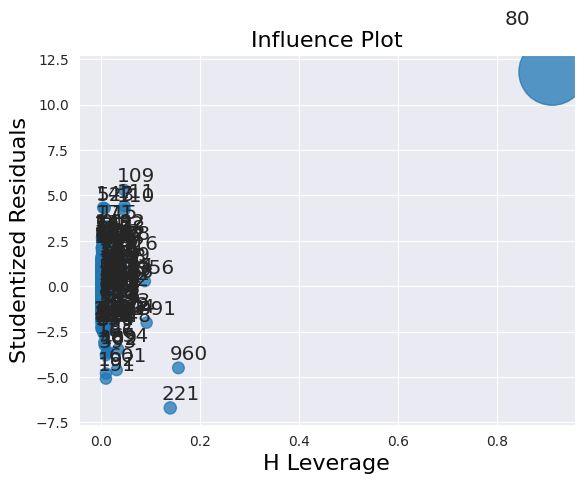

In [ ]:
#levarage plot
influence_plot(model,alpha=0.05)
plt.show()

In [ ]:
#@title improving the model

In [ ]:
df_new[df_new.index.isin([80])]

,price,age,km,hp,cc,doors,gears,tax,wt
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
df_new.head()

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
df1=df_new.drop([80])

In [ ]:
df1

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
#built model

In [ ]:
final_model_a=smf.ols('price~age+wt+hp+cc+doors+gears+tax',data=df1).fit()

In [ ]:
final_model_a.rsquared,final_model_a.aic

(0.8501536890932266, 24850.4719181023)

In [ ]:
final_model_k=smf.ols('price~km+wt+hp+cc+doors+gears+tax',data=df1).fit()

In [ ]:
final_model_k.rsquared,final_model_k.aic

(0.663257236951767, 26011.594838623605)

In [ ]:
#cooks distance
model_influence_a=final_model_a.get_influence()
(c_a,_)=model_influence_a.cooks_distance

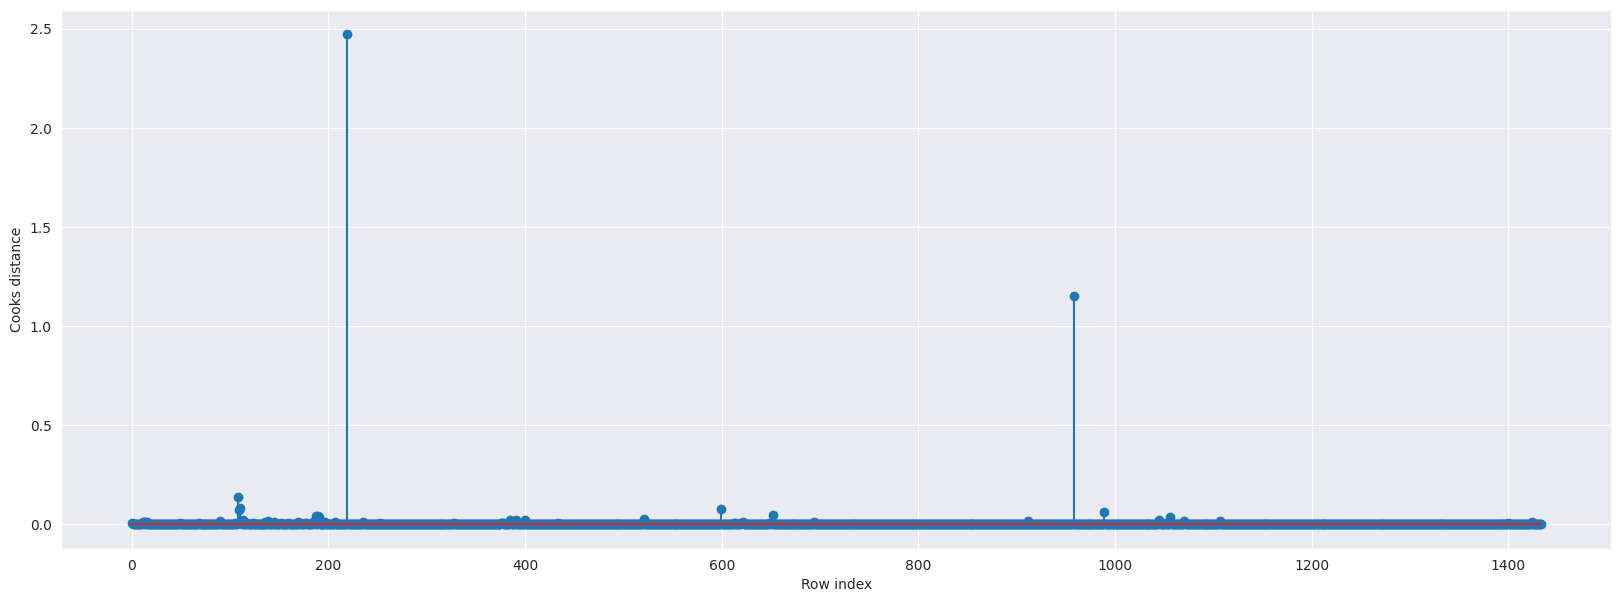

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_a,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [ ]:
(np.argmax(c_a),np.max(c_a))

(219, 2.471628541850942)

In [ ]:
df2=df1.drop([219])

In [ ]:
df2

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df3=df2.reset_index()

In [ ]:
df3

,index,price,age,km,hp,cc,doors,gears,tax,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1431,7500,69,20544,86,1300,3,5,69,1025
1429,1432,10845,72,19000,86,1300,3,5,69,1015
1430,1433,8500,71,17016,86,1300,3,5,69,1015
1431,1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df4=df3.drop(['index'],axis=1)

In [ ]:
df4

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
final_model_a=smf.ols('price~age+wt+hp+cc+doors+gears+tax',data=df4).fit()

In [ ]:
final_model_a.rsquared,final_model_a.aic

(0.8501294920417329, 24833.99967110657)

In [ ]:
final_model_k=smf.ols('price~km+wt+hp+cc+doors+gears+tax',data=df4).fit()

In [ ]:
final_model_k.rsquared,final_model_k.aic

(0.6634465552136477, 25993.275636118153)

In [ ]:
model_influence_a=final_model_a.get_influence()
(c_a,_)=model_influence_a.cooks_distance

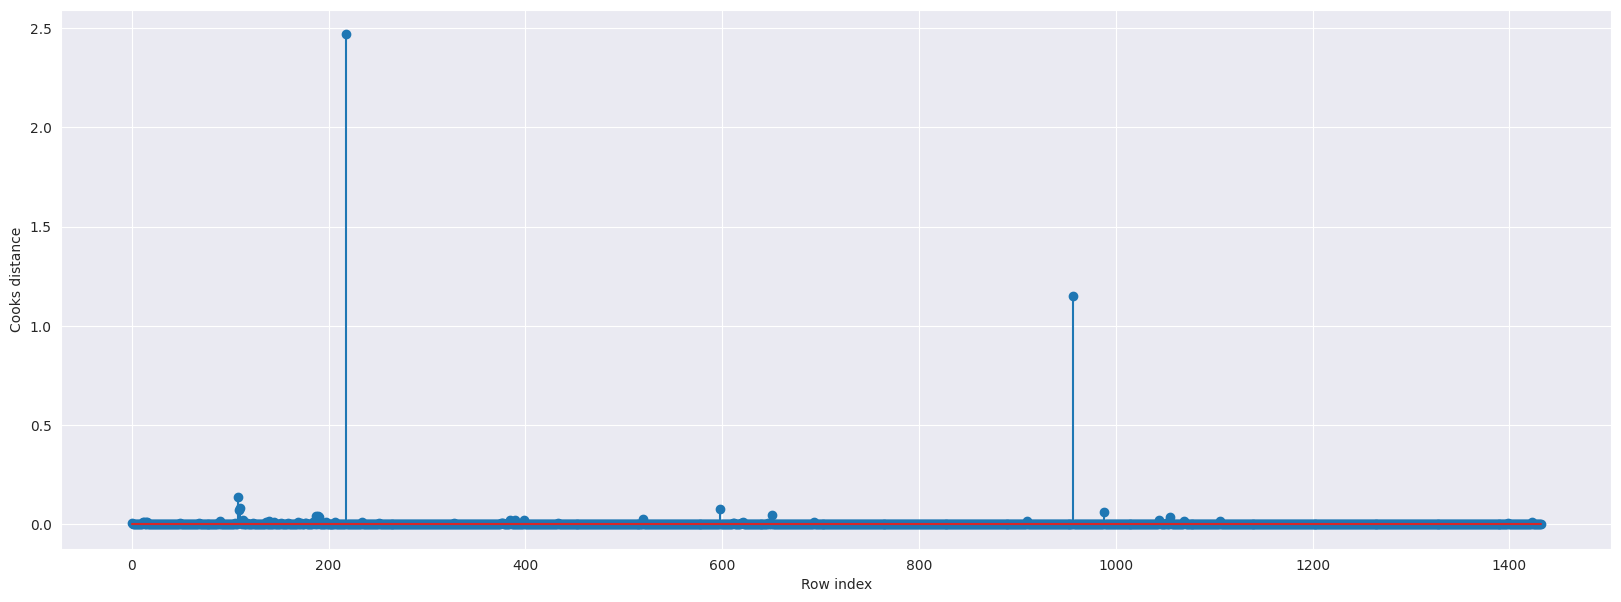

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_a,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [ ]:
np.argmax(c_a),np.max(c_a)

(218, 2.4696838626662836)

In [ ]:
df5=df4.drop([218])

In [ ]:
df5

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
final_model_a=smf.ols('price~age+wt+hp+cc+doors+gears+tax',data=df5).fit()

In [ ]:
final_model_a.rsquared,final_model_a.aic

(0.8597371928901949, 24722.57271315094)

In [ ]:
model_influence_a=final_model_a.get_influence()
(c_a,_)=model_influence_a.cooks_distance

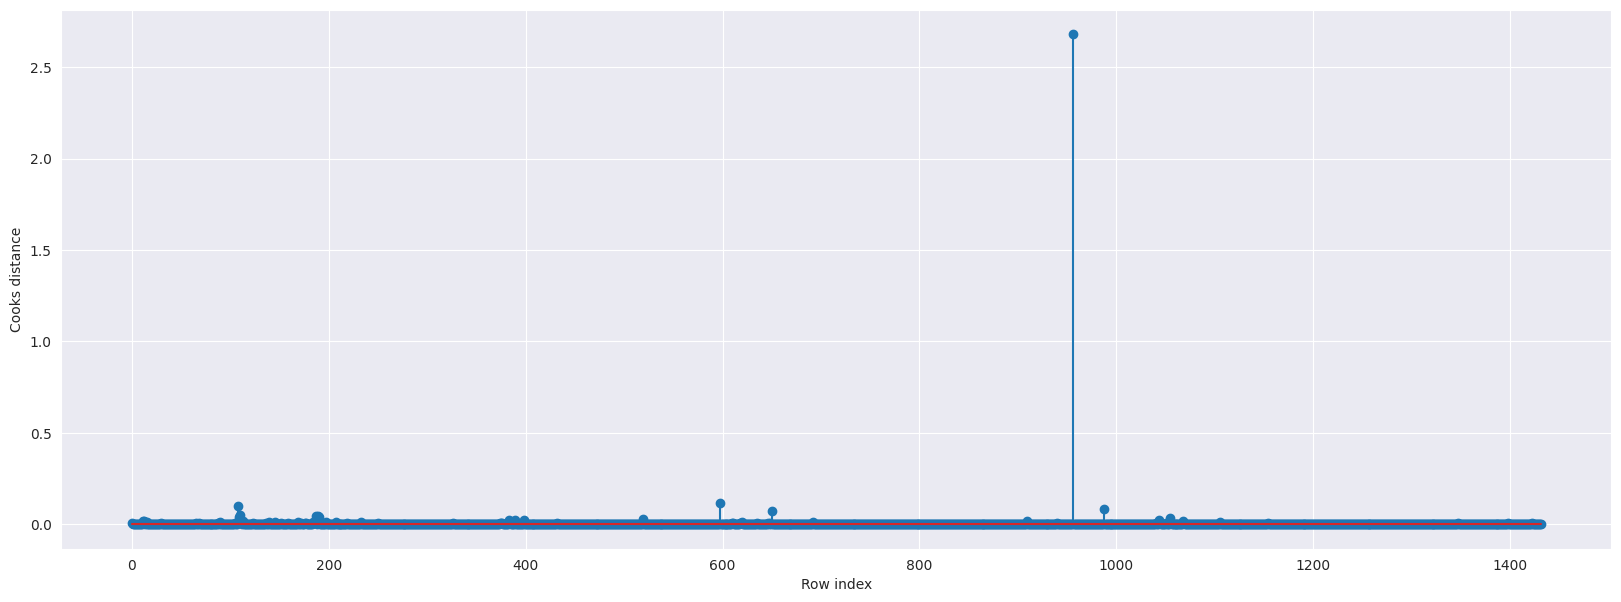

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df5)),np.round(c_a,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [ ]:
np.argmax(c_a),np.max(c_a)

(956, 2.681020065435928)

In [ ]:
df5=df4.drop([956])
df5.head()

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
#@title Predicting for new data

In [ ]:
new_data=pd.DataFrame({'age':24,'km':40400,'hp':90,'cc':2000,'doors':3,'gears':5,'tax':210,'wt':1168},index=['index 1'])
new_data

,age,km,hp,cc,doors,gears,tax,wt
index 1,24,40400,90,2000,3,5,210,1168


In [ ]:
final_model_a.predict(new_data)

index 1    15881.407339
dtype: float64